In [2]:
import pandas as pd

#Reading data
data = pd.read_csv('movie_metadata.csv',nrows = 20)

In [3]:
#Overview of dataset
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0,161.0,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000,23000.0,Christian Bale,27000,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7.1,NaN,0


In [4]:
#Checking for irrelevant or useless columns
print(data.shape)
data.columns

(20, 28)


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
#Dropping unnecessary columns
data.drop(columns=['color','director_facebook_likes','num_critic_for_reviews',
                   'cast_total_facebook_likes','facenumber_in_poster','color',
                   'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes','plot_keywords','num_user_for_reviews',
       'actor_2_facebook_likes','movie_facebook_likes','actor_3_name'], inplace = True)
data.shape

(20, 15)

In [6]:
#Renaming for readability and understanding
data = data.rename(columns={'director_name':'Director','duration':'Runtime',
             'gross':'Gross(USD($M))','title_year':'Released_in_yr',
             'imdb_score':'IMDB(1-10)','actor_1_name':'Lead_Actor',
             'aspect_ratio':'Movie_format','genres':'Genres','movie_title':'Title'
             ,'budget':'Budget(USD($M))'})
data.columns

Index(['Director', 'Runtime', 'Gross(USD($M))', 'Genres', 'Lead_Actor',
       'Title', 'num_voted_users', 'movie_imdb_link', 'language', 'country',
       'content_rating', 'Budget(USD($M))', 'Released_in_yr', 'IMDB(1-10)',
       'Movie_format'],
      dtype='object')

In [7]:
#Null values count in each column
data.isnull().sum() 

Director           0
Runtime            1
Gross(USD($M))     1
Genres             0
Lead_Actor         0
Title              0
num_voted_users    0
movie_imdb_link    0
language           1
country            1
content_rating     1
Budget(USD($M))    1
Released_in_yr     1
IMDB(1-10)         0
Movie_format       1
dtype: int64

In [8]:
data['Runtime'] = pd.to_numeric(data['Runtime'])

In [9]:
#Filling nulls values in each column with suitable values 
fill_nulls_with = {'Director':'Unknown','Runtime':data['Runtime'].min(),'Gross(USD($M))':data['Gross(USD($M))'].mean()
                   ,'Lead_Actor':'Unknown','language':'Unknown',
                   'country':'Unknown','content_rating':'Unknown','Budget(USD($M))':data['Budget(USD($M))'].mean()
                   ,'Released_in_yr':data['Released_in_yr'].min(),'Movie_format':2.39}
data.fillna(fill_nulls_with,inplace = True)

In [11]:
data['Director'].astype(str).unique()

array(['James Cameron', 'Gore Verbinski', 'Sam Mendes',
       'Christopher Nolan', 'Doug Walker', 'Andrew Stanton', 'Sam Raimi',
       'Nathan Greno', 'Joss Whedon', 'David Yates', 'Zack Snyder',
       'Bryan Singer', 'Marc Forster', 'Andrew Adamson', 'Rob Marshall',
       'Barry Sonnenfeld'], dtype=object)

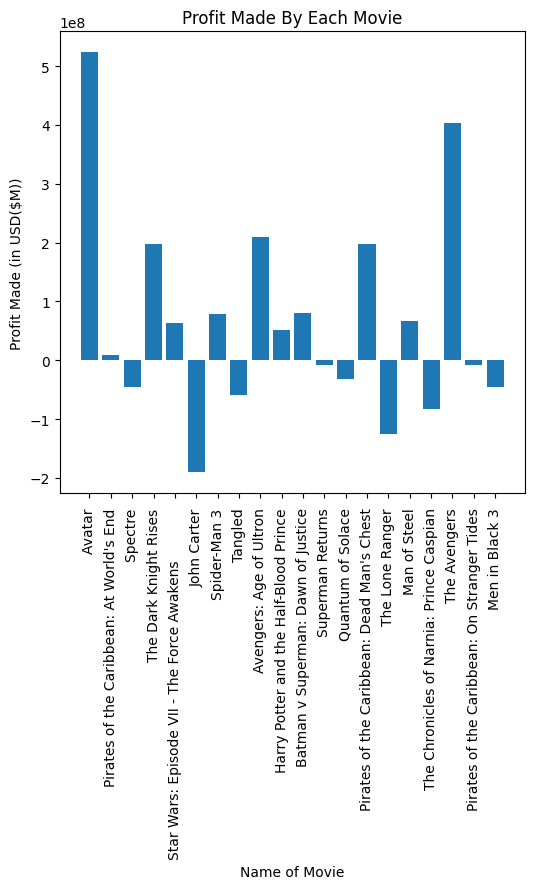

In [34]:
#Visualizing profits made by each movie
import matplotlib.pyplot as plt

profits = data['Gross(USD($M))']-data['Budget(USD($M))']
plt.figure(figsize=(6,6))
plt.bar(data['Title'],profits)
plt.xticks(rotation=90)
plt.title('Profit Made By Each Movie')
plt.xlabel('Name of Movie')
plt.ylabel('Profit Made (in USD($M))')
plt.show()